In [1]:
#Read training data
import pandas as pd
fileName = "trainData.csv"
df = pd.read_csv(fileName, sep = ',')

In [2]:
df.head()

,ID,O,C,H,L,V,BV,Mean,T,MarketName,Reward
0,4,-0.018060,0.012889,0.011777,-0.009781,0.838961,0.849676,0.001180,2015-12-15,BTC-LTC,0.118046
1,4,0.011609,-0.017773,-0.009005,0.002394,-0.295003,-0.300707,-0.003464,2015-12-16,BTC-LTC,-0.346367
2,4,-0.016522,0.026429,0.007796,0.007197,-0.238974,-0.232854,0.007503,2015-12-17,BTC-LTC,0.750303
3,4,0.021972,-0.024771,-0.014549,0.001388,0.643869,0.634503,-0.006758,2015-12-18,BTC-LTC,-0.675804
4,4,-0.020528,0.003278,-0.016248,-0.002521,-0.855318,-0.856800,-0.009483,2015-12-19,BTC-LTC,-0.948274


In [3]:
colnames = ['T','O','C','H','L','V','BV']
reward_cols = ['T','Reward']

In [4]:
eth = df[(df['MarketName'] == 'BTC-ETH')][colnames]
xrp = df[(df['MarketName'] == 'BTC-XRP')][colnames]
ltc = df[(df['MarketName'] == 'BTC-LTC')][colnames]
xlm = df[(df['MarketName'] == 'BTC-XLM')][colnames]
usd = df[(df['MarketName'] == 'USDT-BTC')][colnames]

In [5]:
eth.head()

,T,O,C,H,L,V,BV
1235,2015-12-15,0.015275,-0.023044,-0.002150,-0.016174,0.419006,0.411878
1236,2015-12-16,-0.036503,0.001192,0.040730,-0.032838,0.500554,0.485358
1237,2015-12-17,0.015463,-0.063636,-0.078651,-0.048164,-0.394836,-0.423502
1238,2015-12-18,-0.063636,-0.041748,-0.068826,-0.005056,-0.407574,-0.437244
1239,2015-12-19,-0.041748,-0.009620,-0.030636,-0.032878,0.105960,0.092657


In [6]:
eth_reward = df[(df['MarketName'] == 'BTC-ETH')][reward_cols]
xrp_reward = df[(df['MarketName'] == 'BTC-XRP')][reward_cols]
ltc_reward = df[(df['MarketName'] == 'BTC-LTC')][reward_cols]
xlm_reward = df[(df['MarketName'] == 'BTC-XLM')][reward_cols]
usd_reward = df[(df['MarketName'] == 'USDT-BTC')][reward_cols]

In [7]:
eth_reward.head()

,T,Reward
1235,2015-12-15,-0.896561
1236,2015-12-16,0.523557
1237,2015-12-17,-6.449900
1238,2015-12-18,-3.870695
1239,2015-12-19,-3.173201


In [8]:
merged1 = pd.merge(eth, xrp, on = 'T', suffixes=('_eth', '_xrp'))
merged2 = pd.merge(ltc, xlm, on = 'T', suffixes=('_ltc', '_xlm'))
merged = pd.merge(merged1, merged2, on = 'T')
merged = pd.merge(merged, usd, on = 'T')
merged.head()

,T,O_eth,C_eth,H_eth,L_eth,V_eth,BV_eth,O_xrp,C_xrp,H_xrp,...,H_xlm,L_xlm,V_xlm,BV_xlm,O,C,H,L,V,BV
0,2015-12-15,0.015275,-0.023044,-0.002150,-0.016174,0.419006,0.411878,-0.250256,-0.100416,-0.212046,...,-0.043933,-0.144351,1029.180334,885.502597,0.000000,0.071429,0.071429,0.000000,1320.637261,1410.396749
1,2015-12-16,-0.036503,0.001192,0.040730,-0.032838,0.500554,0.485358,-0.111491,0.131640,-0.027795,...,-0.052516,0.000000,-0.521941,-0.507073,0.071429,0.002222,0.044444,0.071429,-0.815032,-0.810448
2,2015-12-17,0.015463,-0.063636,-0.078651,-0.048164,-0.394836,-0.423502,0.131640,-0.024490,-0.025341,...,-0.055427,0.000000,-0.992587,-0.992851,0.071429,0.002222,0.044444,0.071429,-0.815032,-0.810448
3,2015-12-18,-0.063636,-0.041748,-0.068826,-0.005056,-0.407574,-0.437244,-0.040816,-0.056485,-0.054000,...,0.058680,0.019560,1.314162,1.401100,0.020000,0.017738,-0.023404,0.020000,-0.999841,-0.999841
4,2015-12-19,-0.041748,-0.009620,-0.030636,-0.032878,0.105960,0.092657,-0.036879,-0.002956,-0.038055,...,-0.053118,-0.098321,11.826813,10.635375,-0.017429,-0.017429,-0.017429,-0.017429,863.027096,847.967800


# REINFORCEMENT LEARNING SETTINGS

In [9]:
import random
import numpy as np
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.preprocessing import MinMaxScaler
from random import randint

Using TensorFlow backend.


In [10]:
EPISODES = 50

class TradingAction(object):
    ETH = 0
    XRP = 1
    LTC = 2
    XLM = 3
    USD = 4
    
class TradingEnv:
  def __init__(self):
    #Actions : 0. eth, 1. xrp, 2. ltc, 3. xlm, 4. usd 
    pass

  def reset(self):
    pass

  def __init__(self):
    #Actions : 0. eth, 1. xrp, 2. ltc, 3. xlm, 4. usd 
    pass

  def step(self, action, date):
    reward = 0
    if action == TradingAction.ETH:
        reward = eth_reward[(eth_reward['T'] == date)]['Reward']
    if action == TradingAction.XRP:
        reward = xrp_reward[(xrp_reward['T'] == date)]['Reward']
    if action == TradingAction.LTC:
        reward = ltc_reward[(ltc_reward['T'] == date)]['Reward']
    if action == TradingAction.XLM:
        reward = xlm_reward[(xlm_reward['T'] == date)]['Reward']
    if action == TradingAction.USD:
        reward = usd_reward[(usd_reward['T'] == date)]['Reward']
    return reward

In [11]:
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95    # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()

    def _build_model(self):
        # Neural Net for Deep-Q learning Model
        model = Sequential()
        model.add(Dense(64, input_dim=self.state_size, activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(lr=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])  # returns action

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                temp_pred = np.amax(self.model.predict(next_state)[0])
                target = (reward + self.gamma * temp_pred)
            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def load(self, name):
        self.model.load_weights(name)

    def save(self, name):
        self.model.save_weights(name)

In [23]:
#Split as Train and Test data
row_count = merged.shape[0]
split_point = int(row_count - 60)
train_data, test_data = merged[:split_point], merged[split_point:]
test_data.head()

,T,O_eth,C_eth,H_eth,L_eth,V_eth,BV_eth,O_xrp,C_xrp,H_xrp,...,H_xlm,L_xlm,V_xlm,BV_xlm,O,C,H,L,V,BV
1175,2019-03-04,-0.012529,-0.012618,-0.023630,-0.013846,0.510812,0.475972,-0.003773,-0.003555,-0.004609,...,-0.025793,-0.003682,-0.410088,-0.430252,-0.005227,-0.021530,-0.001743,-0.030729,1.592960,1.522386
1176,2019-03-05,-0.013927,0.048061,0.036362,0.010416,0.402531,0.438517,-0.006842,0.003690,0.004874,...,-0.027344,0.007852,-0.109622,-0.110559,-0.023666,0.036065,0.012803,0.009537,0.850213,0.876401
1177,2019-03-06,0.050062,0.005023,0.015115,0.035901,-0.135164,-0.115009,0.003690,0.003309,0.007518,...,-0.008032,-0.001375,-0.534653,-0.537858,0.037675,0.004008,0.004364,0.030229,-0.642258,-0.634037
1178,2019-03-07,0.000995,-0.009956,-0.007603,0.006653,-0.205628,-0.207156,0.003799,-0.013315,-0.012998,...,-0.004049,-0.001836,0.415438,0.412235,0.002449,0.003125,0.002387,0.007860,0.346091,0.354345
1179,2019-03-08,-0.006622,-0.019513,-0.012309,-0.030286,0.030882,0.017551,-0.013919,-0.015105,-0.013413,...,0.034327,0.011494,1.452174,1.517361,0.003125,-0.002567,0.006259,-0.014817,0.483838,0.487514


In [27]:
#TRAIN AGENT
observation_cols = ['O_eth','C_eth','H_eth','L_eth','V_eth','BV_eth','O_xrp','C_xrp','H_xrp','L_xrp','V_xrp','BV_xrp','O_ltc','C_ltc','H_ltc','L_ltc','V_ltc','BV_ltc','O_xlm','C_xlm','H_xlm','L_xlm','V_xlm','BV_xlm','O','C','H','L','V','BV']
state_size = len(observation_cols)
action_size = 5
agent = DQNAgent(state_size, action_size)
# agent.load("./save/trading-dqn.h5")

done = False
batch_size = 32
best_score = 0
best_action = 0
best_reward = -100000

for e in range(EPISODES):
    total_reward = 0
    for idx in range(len(train_data)-1):
        state = train_data.iloc[idx][observation_cols]
        state = np.reshape([state], [1, state_size])
        
        action = agent.act(state)
        reward = env.step(action, train_data.iloc[idx]['T'])
        
        next_state = train_data.iloc[idx+1][observation_cols]
        next_state = np.reshape([next_state], [1, state_size])
        
        agent.remember(state, action, reward, next_state, done)

        total_reward = total_reward + reward.item() 
        if total_reward >= best_reward:
            best_reward = total_reward
            best_action = action
        if len(agent.memory) > batch_size:
            agent.replay(batch_size)
    print("episode: {}, best_reward: {}, total_reward: {}" .format(e, best_reward, total_reward))


episode: 0, best_reward: 591.3503079885982, total_reward: 555.8445727608567
episode: 1, best_reward: 591.3503079885982, total_reward: 180.76353121347395
episode: 2, best_reward: 602.073500322238, total_reward: 444.242491640371
episode: 3, best_reward: 1324.9316336016655, total_reward: 1267.723638138432
episode: 4, best_reward: 1607.462554219562, total_reward: 1586.8928016761365
episode: 5, best_reward: 1989.6145845719516, total_reward: 1953.286233121661
episode: 6, best_reward: 2290.937860557114, total_reward: 2289.1924098797795
episode: 7, best_reward: 2491.5258136060693, total_reward: 2483.9136050741618
episode: 8, best_reward: 2491.5258136060693, total_reward: 2426.694660701037
episode: 9, best_reward: 2491.5258136060693, total_reward: 1746.2940670106493
episode: 10, best_reward: 2491.5258136060693, total_reward: 1961.22972363088
episode: 11, best_reward: 2685.535280848861, total_reward: 2682.6306479562786
episode: 12, best_reward: 2685.535280848861, total_reward: 2256.8032152867
ep

In [18]:
#Save Agent
agent.save("./save/trading-dqn.h5")

In [34]:
#TEST AGENT
done = False
batch_size = 32
test_reward = 0
reward_list = []
for idx in range(len(test_data)):
    state = test_data.iloc[idx][observation_cols]
    state = np.reshape([state], [1, state_size])

    action = agent.act(state)
    reward = env.step(action, test_data.iloc[idx]['T'])

    test_reward = test_reward + reward.item() 
    reward_list.append(reward.item())
print("Test_reward: {}" .format(test_reward))

Test_reward: 21.333948207730213


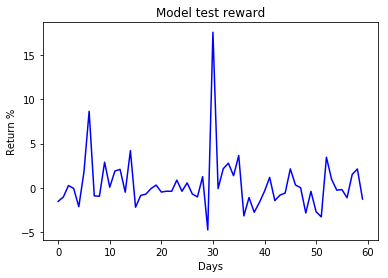

In [35]:
#Plot rewards
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.arange(0,len(test_data),1),reward_list, c='b')
plt.title('Model test reward')
plt.ylabel('Return %')
plt.xlabel('Days')
plt.show()